# Investigating the Airbnb Seattle Dataset between 2016 and 2017 

## Understading the Business and the Datasets

Airbnb have offered a more unique and personalized way to its guests and hosts since 2008. The Airbnb Seattle dataset is part the Airbnb Inside initiative and describes the listing activity of homestays in Seattle, WA. The dataset contains the activities in Seattle between 2016 and 2017. 
The dataset includes 3 separate datasets. These are listings, reviews and calendar. 
- The Listings contain full descriptions and average review score.
- The Reviews contain unique id for each reviewer and detailed comments.
- The Calendar contain listing id and the price and availability for that day. 

#### Acknowledgements
This dataset is part of the Airbnb Inside and it is obtained from Kaggle.
 

### Questions:

1. When do people visit Seattle mostly? Is there a particular month or a season that the Airbnb prices are high in Seattle?

2. Does a neighbourhood affect the listing price? What are the most expensive listing price and the least expensive listing price in Seattle neighbourhoods?

3. Can we predict a listing price in Seattle Airbnb? What are the key variables for predicting a listing price?

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter
import seaborn as sb
%matplotlib inline


In [2]:
# Loading the files
df_reviews = pd.read_csv('./data/reviews.csv')
df_listings = pd.read_csv('./data/listings.csv')
df_calendar = pd.read_csv('./data/calendar.csv')

In [3]:
# Showing the first a few rows of the datasets
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## Understanding and Assessing the datasets

In [6]:
# Assessing the Reviews dataset
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [7]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

### Findings on the Reviews dataset

1. There are 84849 rows and 6 columns.

2. 18 values are missing in the review column. These rows can be dropped later.

3. The date column's data type is string and it will be changed to the date if needed. 

In [8]:
# Assessing the Calendar dataset
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [9]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [10]:
df_calendar['price'].isnull().sum()/df_calendar['price'].shape[0]

0.32938998399793334

In [11]:
df_calendar['price'].value_counts()

$150.00    36646
$100.00    31755
$75.00     29820
$125.00    27538
$65.00     26415
           ...  
$751.00        1
$759.00        1
$12.00         1
$685.00        1
$554.00        1
Name: price, Length: 669, dtype: int64

### Findings on the Calendar dataset

1. There are 1393570 rows and 4 columns.
2. Almost 33% of the price column's data is missing. The missing rows can be dropped (but it is a big portion of the column) or the missing data can be filled with mean value. It will be decided depending on the evaluation of this datase.
3. The price column's data type is object and it will be changed to float and the "$" sign will be removed. 
4. The date column's data type is string and it will be changed to the date if needed. 

In [12]:
# Assessing the Listings dataset
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [13]:
df_listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [14]:
df_listings['price'].isnull().sum()

0

### Findings on the Listings dataset

1. There are 3818 rows and 92 columns.
2. The price column's data type is object and it will be changed to float and the "$" sign will be removed. 
3. The unused columns will be dropped.
4. The missing values will be taken care of by dropped or filled with mean, mode or median.

## Preparing the Dataset and Exploratory Plots

In [15]:
# Changing data type and removing the "$" in the price column in the Calendar dataset
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True)
df_calendar['price'] = df_calendar['price'].astype('float')

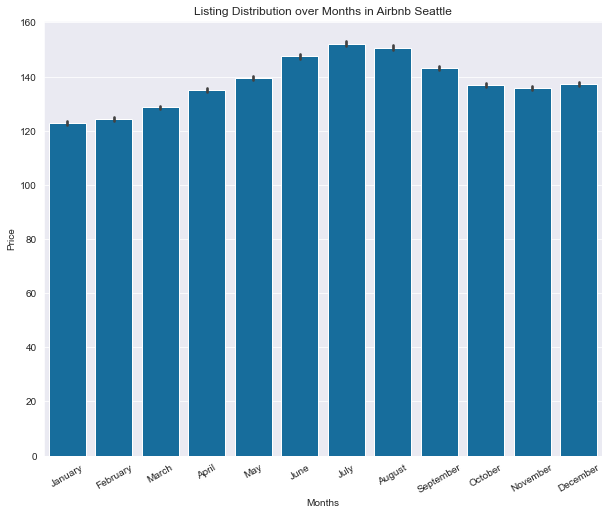

In [16]:
# Changing the data type of the date column in the Calendar dataset
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['listing_date'] = df_calendar.date.dt.strftime('%Y-%m-%d')
df_calendar['listing_month'] =  df_calendar.date.dt.strftime('%B')
df_calendar['listing_day'] =  df_calendar.date.dt.strftime('%A')

# Listing distibution over months
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_calendar['listing_month'] = df_calendar['listing_month'].astype(monthcat)

#df_calendar.dropna(subset = ["price"], inplace=True)

# Plotting the listing distribution over months
plt.rcParams['figure.figsize']=10,8
color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.barplot(data=df_calendar, x='listing_month', y='price', color=color)
plt.xticks(rotation=30)
plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Listing Distribution over Months in Airbnb Seattle');

The plot shows that the highest prices in Seattle Airbnb listings are between June and August. July is the most expensive months. After August the listing prices start decreasing and the start increasing again in December. 

In [17]:
# Changing data type and removing the "$" in the price column in the Calendar dataset
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True)
df_listings['price'] = df_listings['price'].astype('float')

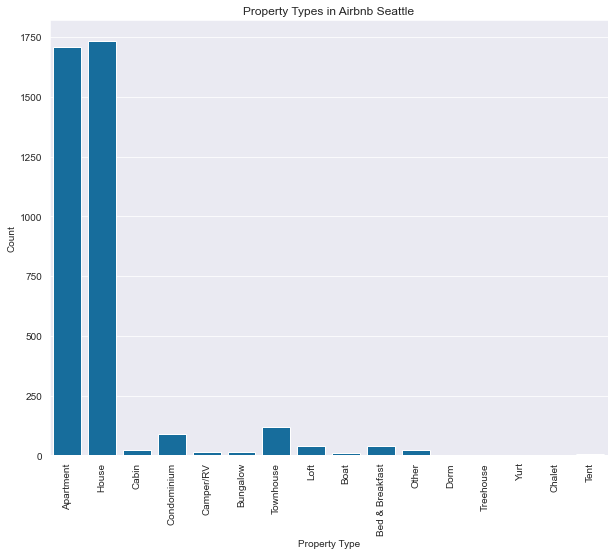

In [18]:
sb.countplot(data=df_listings, x='property_type', color=color)
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Property Types in Airbnb Seattle');

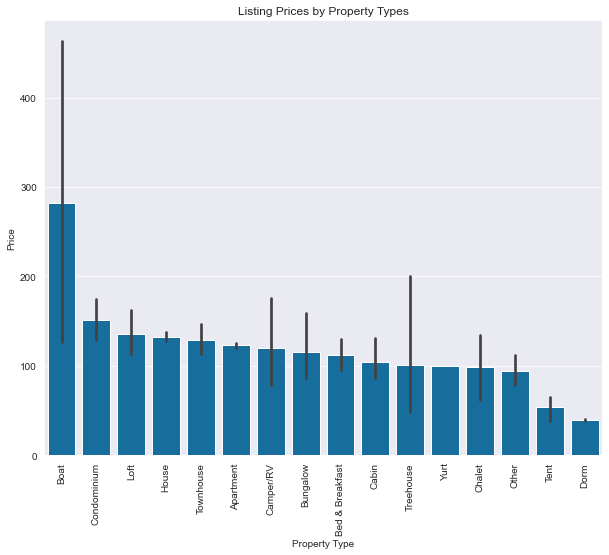

In [19]:
plot_order = df_listings.groupby('property_type')['price'].mean().sort_values(ascending=False).index.values
sb.barplot(data=df_listings, x='property_type', y='price', color=color, order=plot_order)
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Listing Prices by Property Types');

The plots show that houses and apartments are the most common property types. The boats are the most expensive listings in Airbnb Seattle. 

In [20]:
df_listings.groupby('property_type')['price'].mean().sort_values(ascending=False).head(10)

property_type
Boat               282.375000
Condominium        151.109890
Loft               135.700000
House              132.351414
Townhouse          129.457627
Apartment          122.932670
Camper/RV          120.461538
Bungalow           115.615385
Bed & Breakfast    112.054054
Cabin              104.666667
Name: price, dtype: float64

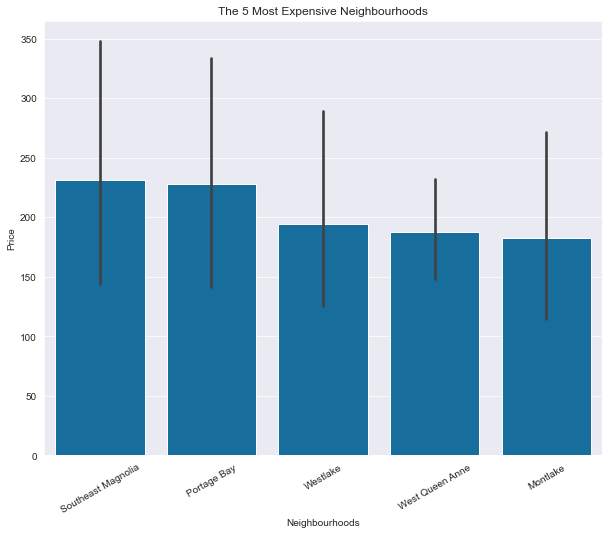

In [21]:
plot_order = df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).index.values
sb.barplot(data=df_listings, x='neighbourhood_cleansed', y='price', color=color, order=plot_order[0:5])

plt.xticks(rotation=30)
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.title('The 5 Most Expensive Neighbourhoods');

In [22]:
df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(5)

neighbourhood_cleansed
Southeast Magnolia    231.705882
Portage Bay           227.857143
Westlake              194.470588
West Queen Anne       187.769231
Montlake              182.789474
Name: price, dtype: float64

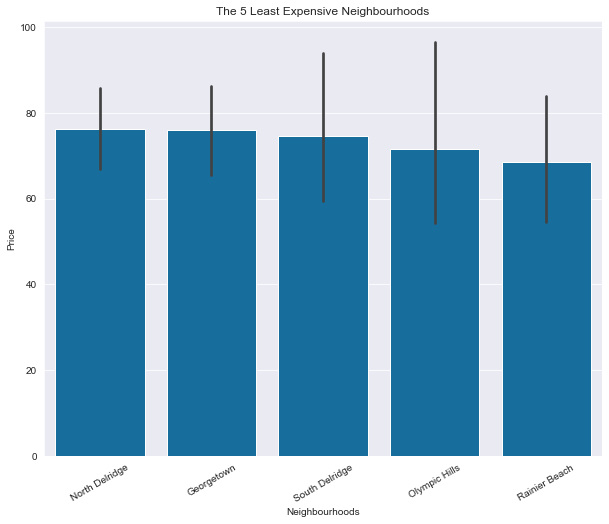

In [23]:
plot_order = df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).index.values
sb.barplot(data=df_listings, x='neighbourhood_cleansed', y='price', color=color, order=plot_order[82:87])

plt.xticks(rotation=30)
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.title('The 5 Least Expensive Neighbourhoods');

In [24]:
df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).tail()

neighbourhood_cleansed
North Delridge    76.375000
Georgetown        76.125000
South Delridge    74.666667
Olympic Hills     71.687500
Rainier Beach     68.555556
Name: price, dtype: float64

The most expensive listing is in Southeast Magnolia and its avarage is $231. 

The least expesive listing is in Rainier Beach and its avarage is $68.5. 

## Modelling

In this section the listings dataset will be prepared for the price prediction modelling. Data cleaning steps includes; dropping some columns, changing data types, removing signs and texts from the rows and columns, filling missing values by mean, mode or median of the columns and removing the missing values if needed. 

In [25]:
# Dropping used columns
drop_columns = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month', 'experiences_offered','market','jurisdiction_names']
df_listings = df_listings.drop(drop_columns, axis=1)

In [26]:
df_listings.shape

(3818, 62)

In [27]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              3818 non-null   object 
 1   summary                           3641 non-null   object 
 2   space                             3249 non-null   object 
 3   description                       3818 non-null   object 
 4   neighborhood_overview             2786 non-null   object 
 5   notes                             2212 non-null   object 
 6   transit                           2884 non-null   object 
 7   picture_url                       3818 non-null   object 
 8   host_name                         3816 non-null   object 
 9   host_since                        3816 non-null   object 
 10  host_location                     3810 non-null   object 
 11  host_about                        2959 non-null   object 
 12  host_r

In [28]:
# Changing data types and removing "$" in cleaning_fee, extra_people, security_deposit and host_response rate columns
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].replace('[$,]','', regex=True).astype(float)
df_listings['extra_people'] = df_listings['extra_people'].replace('[$,]','', regex=True).astype(float)
df_listings['security_deposit'] = df_listings['security_deposit'].replace('[$,]','', regex=True).astype(float)
df_listings['host_response_rate'] = df_listings['host_response_rate'].replace('%','', regex=True).astype(float)

In [29]:
# Removing empty rows in the property_type column
df_listings = df_listings.dropna(subset=['property_type'], axis=0)

# Tidying the city and state columns
df_listings['city'] = df_listings['city'].str.lower()
df_listings['city'] = df_listings['city'].str.strip()
df_listings['state'] = df_listings['state'].str.lower()

Filling the null values:
- Host_response_rate, security_deposit and cleaning_fee columns have blanks fields. These fields will be field with 0.
- For bathroom, bedroom and beds columns, host_listing_count,host_total_listings_count, the null values will be filled with 1.
- The null values in review_score columns will be filled with 0 assuming there is no review scores for them.

In [30]:
# Filling missing values with 1, 0 and N/A
df_listings['host_response_time'] = df_listings['host_response_time'].fillna('N/A')
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].fillna('N/A')
df_listings['host_response_rate'] = df_listings['host_response_rate'].fillna(0)
df_listings['security_deposit'] = df_listings['security_deposit'].fillna(0)
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].fillna(0)

df_listings['bathrooms'] = df_listings['bathrooms'].fillna(1)
df_listings['bedrooms'] = df_listings['bedrooms'].fillna(1)
df_listings['beds'] = df_listings['beds'].fillna(1)

df_listings['host_listings_count'] = df_listings['host_listings_count'].fillna(1)
df_listings['host_total_listings_count'] = df_listings['host_total_listings_count'].fillna(1)

review_cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in review_cols:
    df_listings[col] = df_listings[col].fillna(0)
    
# Dropping square_feet and licence columns
df_listings = df_listings.drop('square_feet',axis=1)
df_listings = df_listings.drop('license',axis=1)

In [31]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              3817 non-null   object 
 1   summary                           3640 non-null   object 
 2   space                             3248 non-null   object 
 3   description                       3817 non-null   object 
 4   neighborhood_overview             2785 non-null   object 
 5   notes                             2211 non-null   object 
 6   transit                           2883 non-null   object 
 7   picture_url                       3817 non-null   object 
 8   host_name                         3815 non-null   object 
 9   host_since                        3815 non-null   object 
 10  host_location                     3809 non-null   object 
 11  host_about                        2958 non-null   object 
 12  host_r

In [32]:
# Changing the rows with text to boolean
def change_text(textdata):
    '''
    Function to change all text fields to boolean
    INPUT:
    textdata - the text fields need to changed to boolean
    OUTPUT:
    Boolean 0 or 1 - if it is text return to 1 if not 0
    
    Converts text data to boolean showing the presence or absence of the text data
    '''
    if textdata:
        return 1
    else:
        return 0
    
rows_with_text = ['summary','space','neighborhood_overview','notes','transit','name','description','picture_url','host_name','host_since','host_location','host_about','host_picture_url','host_neighbourhood']
for t in rows_with_text:
    df_listings[t] = df_listings[t].apply(change_text)

In [35]:
# Changing True and False to 1 and 0
def change_tf(tfdata):
    '''
    Function to change the true/false fields to 1/0
    INPUT:
    textdata - the true/false fields ("t" or "f") need to changed to boolean
    OUTPUT:
    Boolean 0 or 1 - returns 1 if true, 0 for false
    
    Converts true/false fields to boolean with 1 or 0
    '''
    if tfdata == 't':
        return 1
    else:
        return 0
    
rows_with_tf = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for t in rows_with_tf:
    df_listings[t] = df_listings[t].apply(change_tf)

In [36]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              3817 non-null   int64  
 1   summary                           3817 non-null   int64  
 2   space                             3817 non-null   int64  
 3   description                       3817 non-null   int64  
 4   neighborhood_overview             3817 non-null   int64  
 5   notes                             3817 non-null   int64  
 6   transit                           3817 non-null   int64  
 7   picture_url                       3817 non-null   int64  
 8   host_name                         3817 non-null   int64  
 9   host_since                        3817 non-null   int64  
 10  host_location                     3817 non-null   int64  
 11  host_about                        3817 non-null   int64  
 12  host_r

In [37]:
# Assessing the most common amenities
amenities = []
for index, row in df_listings.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

In [38]:
amenities_col =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_col:
    c_colname,c_desc = c.split('|')
    df_listings[c_colname] = df_listings['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [39]:
# Dropping the original amenities column
df_listings = df_listings.drop('amenities', axis = 1)

In [40]:
# Checking the rest of the object columns
df_listings.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

In [41]:
# Assigning Dummies for categorical fields
cat_values = df_listings.select_dtypes(include=['object']).columns

df_listings = pd.get_dummies(df_listings, columns=cat_values)
df_listings.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1


In [42]:
#Split into explanatory and response variables
X = df_listings.drop(['price'], axis=1)
y = df_listings['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 190) (2671,)
(1146, 190) (1146,)


In [43]:
# Instantiate
lm_model = LinearRegression(normalize=True)

#Fit
lm_model.fit(X_train, y_train) 

# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)

print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.5841631054574172.  The rsquared score on the test data was 0.5890943853591561.


/Users/tugcesahin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


## Evaluation

In [44]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top 20 results
coef_df.head(20)

,est_int,coefs,abs_coefs
8,host_name,3.414669e+16,3.414669e+16
3,description,-3.009898e+16,3.009898e+16
9,host_since,2.846420e+16,2.846420e+16
4,neighborhood_overview,2.537701e+16,2.537701e+16
14,host_picture_url,-2.474048e+16,2.474048e+16
159,city_west seattle,-1.752448e+16,1.752448e+16
156,"city_ballard, seattle",-1.752448e+16,1.752448e+16
158,city_seattle,-1.752448e+16,1.752448e+16
160,city_西雅图,-1.752448e+16,1.752448e+16
157,city_phinney ridge seattle,-1.752448e+16,1.752448e+16
